In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np              

plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import json
data = []
with open("./dataset/arxiv-metadata-oai-snapshot.json", 'r') as f: 
    for idx, line in enumerate(f): 
        d = json.loads(line)
        d = {'title': d['title'], 'authors': d['authors'], 'categories': d['categories'], 'authors_parsed': d['authors_parsed'], "update_date": d["update_date"]}
        data.append(d)
        
data = pd.DataFrame(data)

In [6]:
# 筛选计算机视觉2020年论文
dataALL_ath = data.copy(deep=True)
dataALL_ath["year"] = pd.to_datetime(dataALL_ath["update_date"]).dt.year
dataNear_ath = dataALL_ath[dataALL_ath["year"] >= 2020]
dataNear_ath.reset_index(drop=True, inplace=True)

dataNear_athCV = dataNear_ath[dataNear_ath['categories'].apply(lambda x: 'cs.CV' in x)]

In [7]:
# 拼接所有作者
near_athAI = sum(dataNear_athCV['authors_parsed'], [])

Text(0.5, 1.0, '计算机视觉领域参与作者发文数量Top10')

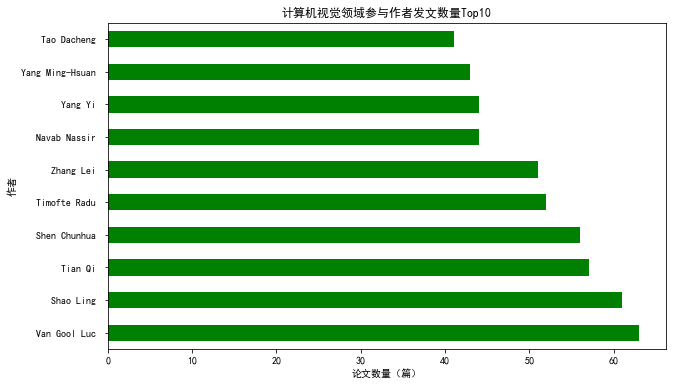

In [8]:
# 拼接所有的作者
near_athCS_pj = [' '.join(x) for x in near_athAI]
near_athCS_pj = pd.DataFrame(near_athCS_pj, columns=["name"])

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
name_count = near_athCS_pj["name"].value_counts()
name_count.head(10).plot(kind='barh', color='g')

# 修改图配置
# names = near_athCS_pj[0].value_counts().index.values[:10]
# _ = plt.yticks(range(0, len(names)), names)
plt.ylabel('作者')
plt.xlabel("论文数量（篇）")
plt.title("计算机视觉领域参与作者发文数量Top10")

Text(0.5, 1.0, '计算机视觉领域第一作者发文数量Top10')

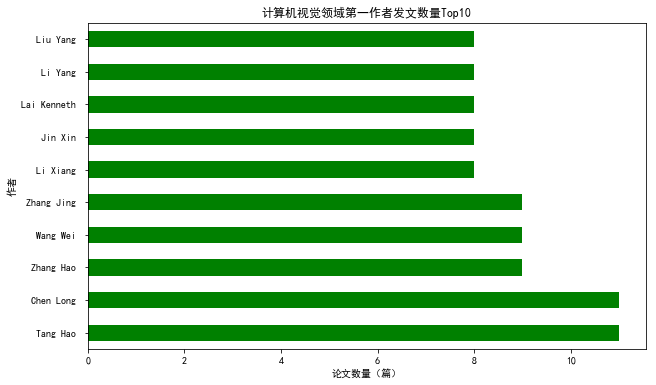

In [9]:
 # 拼接所有第一作者
 near_athCV_1st = []
 for authors in dataNear_athCV['authors_parsed']:
     near_athCV_1st.append(' '.join(authors[0]))

near_athCV_1st = pd.DataFrame(near_athCV_1st, columns=["name"])

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
name1st_count = near_athCV_1st["name"].value_counts()
name1st_count.head(10).plot(kind='barh', color='g')
plt.ylabel('作者')
plt.xlabel("论文数量（篇）")
plt.title("计算机视觉领域第一作者发文数量Top10")

In [10]:
name_list = name_count.head(100) 
print(name_list.sum())

2835


In [11]:
name1st_list = name1st_count.head(100)
name1st_list.head(10)

Tang Hao        11
Chen Long       11
Zhang Hao        9
Wang Wei         9
Zhang Jing       9
Li Xiang         8
Jin Xin          8
Lai Kenneth      8
Li Yang          8
Liu Yang         8
Name: name, dtype: int64

## 作者关系

In [12]:
import networkx as nx 
# 创建无向图
G = nx.Graph()

# 只用五篇论文进行构建
for authors in dataNear_athCV['authors_parsed']:
    authors = [' '.join(x) for x in authors]
    # G.add_cycle(authors)
    
    # if authors[0] in name1st_list:
    #     # 第一个作者 与 其他作者链接
    #     for author in authors[1:]:
    #         G.add_edge(authors[0], author) #　添加节点２，３并链接２３节点

    if authors[0] in name_list:
    # 第一个作者 与 其他作者链接
        for author in authors[1:]:
            if author in name_count:
                G.add_edge(authors[0], author) #　添加节点２，３并链接２３节点

E:\prjsoftware\anaconda3\envs\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


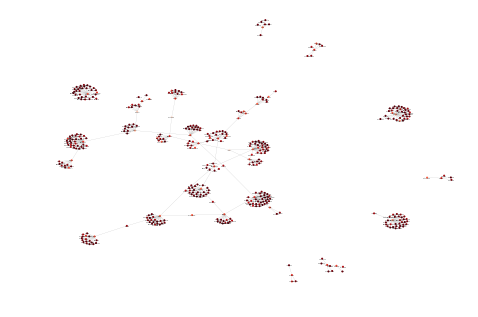

In [13]:
# colors = range(len(G.edges))
options = {
    "node_color": [name_count[x] for x in G.nodes],
    "edge_color": 'grey',
    "width": 0.1,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    'font_size': 0,
    # "node_size": [name_count[x] for x in G.nodes]
    "node_size": 1,
    'cmap': plt.cm.Reds_r
}
# pos = nx.spring_layout(G)
nx.draw(G, **options)

# nodeTopList = [x for x in G.nodes if x in namelist]

# nodeColors=['#FEB748','#EDD25D','#FE4F54','#51B4FF','#dd5555']
# i = 0
# for nodename in nodeTopList:
# # nx.draw_networkx_nodes(G, pos, nodeTopList, node_color=range(len(nodeTopList)), label=nodeTopList)
#     nx.draw_networkx_nodes(G, pos, nodelist=[nodename], node_color=nodeColors[i], node_color=nodeColors[i], label=nodename)
#     i += 1
# plt.legend()

In [ ]:
try:
    print(nx.dijkstra_path(G, 'Balázs C.', 'Ziambaras Eleni'))
except:
    print('No path')

In [ ]:
# 计算论文关系中有多少个联通子图
print(len(nx.communicability(G)))


degree_sequence = sorted([d for n, d in G.degree()])
dmax = max(degree_sequence)

plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()

In [15]:
dataNear_title = dataNear_athCV[dataNear_athCV["authors_parsed"].apply(lambda x: " ".join(x[0]) in name1st_list.head(10))]

In [16]:
import utils
from nltk.corpus import stopwords

# 去除标题中的stop词
def removeStopWords(text,stop_words):
    words=text.split()
    filtered_words=[word for word in words if word not in stop_words]
    return " ".join(filtered_words)


titles=dataNear_title['title'].tolist()
stop_words = set(stopwords.words('english')) 
titles=[title.lower() for title in titles] # 转小写
titles=[removeStopWords(title,stop_words) for title in titles] # 标题列表，每个标题已去除stop词

In [17]:
# 生成 连词01 12 23... 的列表
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)]) # 生成标题单词的子集元组列表
    n_grams= ["_".join(ngram) for ngram in ngrams]  
    n_grams=[ngram for ngram in n_grams if not ngram.startswith("_")]
    n_grams=[ngram for ngram in n_grams if not ngram.endswith("_")]
    return n_grams

from collections import Counter
def getMostCommon(reviews_list, topn=50):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

bigrams_list=[" ".join(generateNGram(title,2)) for title in titles] # 标题词组的字符串 的列表
topn=20
top_bigrams=getMostCommon(bigrams_list,topn=topn)   # Top 词 词频字典
top_bigrams_df=pd.DataFrame()
top_bigrams_df['words']=[val[0] for val in top_bigrams]
top_bigrams_df['Frequency']=[val[1] for val in top_bigrams]

In [18]:
import plotly_express as px
px.bar(data_frame=top_bigrams_df.sort_values("Frequency",ascending=True),x="Frequency",y="words",orientation="h",title= "高产课题关键词 " + "Top "+str(topn))

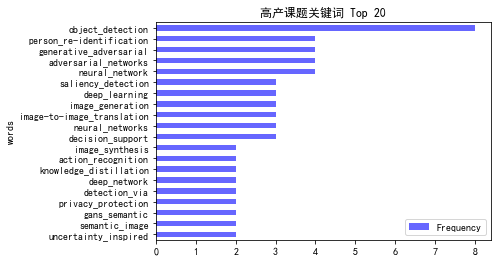

In [19]:
top_bigrams_df.sort_values("Frequency",ascending=True).plot(kind="barh", x="words", y="Frequency", color="b", alpha=0.6,title= "高产课题关键词 " + "Top "+str(topn))